In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def show(X):
    N=len(X)
    mag=np.abs(X)
    split=int(np.ceil((N+1)/2.))
    rn=range(split-N,split)
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.stem(rn,np.concatenate((mag[split:],mag[0:split])))
    plt.xlabel('frequcnce')
    plt.title('magnitude')
    
    a,b=X.real,X.imag
    theta=np.arctan2(b,a)
    
    plt.subplot(1,2,2)
    plt.stem(rn,np.concatenate((theta[split:],theta[0:split])))
    plt.xlabel('frequcnce')
    plt.title('theta') 

<img src='img/3_1.png'>

[(6.801062926733765+0j), (-0.35675319652510207-1.9953297238159176j), (0.334731149645851-0.8061337727016551j), (0.4454573876289384-0.41824248727329594j), (0.4789107573031216-0.18605920303713108j), (0.48721914541743383-5.966713669187691e-17j), (0.4789107573031217+0.18605920303713097j), (0.4454573876289385+0.41824248727329594j), (0.33473114964585127+0.8061337727016551j), (-0.35675319652510173+1.9953297238159178j)]
[ 6.80106293+0.00000000e+00j -0.3567532 -1.99532972e+00j
  0.33473115-8.06133773e-01j  0.44545739-4.18242487e-01j
  0.47891076-1.86059203e-01j  0.48721915-5.55111512e-17j
  0.47891076+1.86059203e-01j  0.44545739+4.18242487e-01j
  0.33473115+8.06133773e-01j -0.3567532 +1.99532972e+00j]


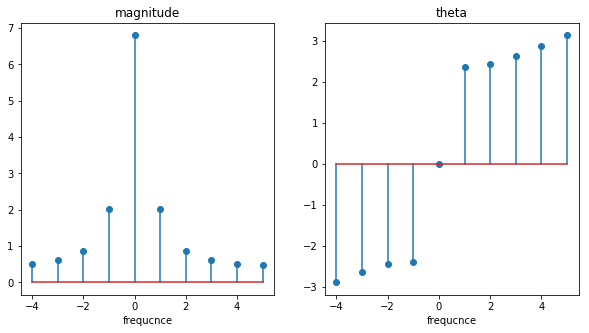

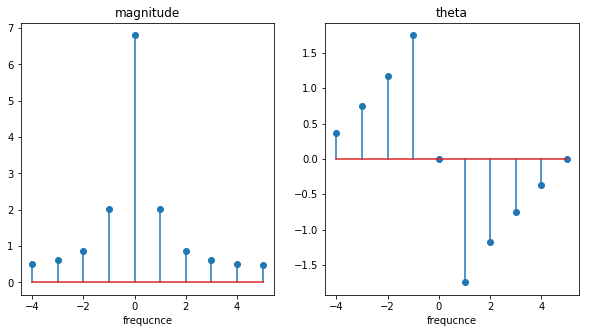

In [45]:
N=10
s=np.sin(np.linspace(0,2,N))
Fs=np.fft.fft(s)
Fsr=np.fft.fft(s[::-1])
Fmy=[np.exp(2*np.pi*1j*k/N)*Fs[(N-k)%N] for k in range(N)]
print(Fmy)
print(Fsr)
show(Fs)
show(Fsr)

<img src='img/3_2.png'>

In [19]:
def kl_signal(N=10):
    s=np.linspace(-1,1,N)
    return s
def interleave(s):
    r=np.zeros(len(s)*2)
    r[0::2]=s
    return r

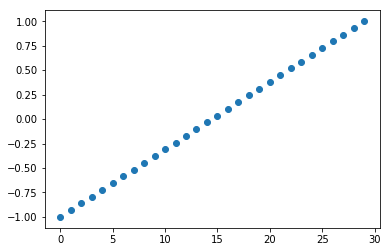

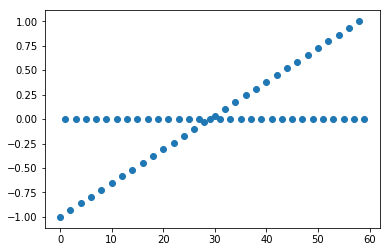

In [20]:
s=kl_signal(30)
plt.figure()
plt.scatter(range(len(s)),s)
s1=interleave(s)
plt.figure()
plt.scatter(range(len(s1)),s1)


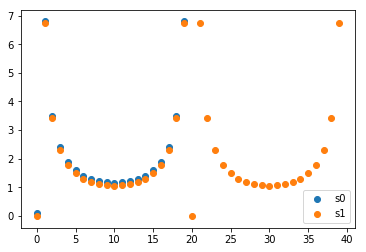

In [37]:
N=20
s0=kl_signal(N)
s1=interleave(s0)
fft_s0=np.fft.fft(s0)
fft_s1=np.fft.fft(s1)
plt.figure()
plt.scatter(range(len(fft_s0)),np.abs(fft_s0)+0.1)
plt.scatter(range(len(fft_s1)),np.abs(fft_s1))
plt.legend(['s0','s1'])

In [81]:
def fourierMatrix(N=4):
    row=np.arange(N)
    jk=np.outer(row,row)
    
    basic=np.exp(-2*np.pi*1j/N)
    
    fbase=basic**jk
    return fbase
def ifourierMatrix(N=4):
    row=np.arange(N)
    jk=np.outer(row,row)
    
    basic=np.exp(2*np.pi*1j/N)
    
    fbase=basic**jk
    return fbase/N
def showMatrix(M,eps=1e-4):
    real=M.real
    img=M.imag
    real=np.where(np.abs(real)>eps,real,0)
    img=np.where(np.abs(img)>eps,img,0)
#     M=real+1j
    print(real)
    print(img)
    print()

<img src='img/3_3.png'>

In [82]:
np.set_printoptions(precision=2)
basic=fourierMatrix()
ibasic=ifourierMatrix()
showMatrix(basic)
showMatrix(basic.dot(ibasic))

[[ 1.  1.  1.  1.]
 [ 1.  0. -1.  0.]
 [ 1. -1.  1. -1.]
 [ 1.  0. -1.  0.]]
[[ 0.  0.  0.  0.]
 [ 0. -1.  0.  1.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0. -1.]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]



In [71]:
ibasic.imag

array([[ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
       [ 0.00e+00,  2.50e-01,  3.06e-17, -2.50e-01],
       [ 0.00e+00,  3.06e-17, -6.12e-17,  9.18e-17],
       [ 0.00e+00, -2.50e-01,  9.18e-17,  2.50e-01]])

<img src='img/3_5.png'>

In [139]:
def rxx(x,m):
    if isinstance(x,list):
        x=np.array(x)
    N=len(x)
    xconj=x.conj()
    autocor=np.array([xconj[(n-m)%N] for n in range(N)])
    
    
    rxxm=x.dot(autocor)
    return rxxm
def rxx_soln(x,m):
    N=len(x)
    if isinstance(x,list):
        x=np.array(x)
    X=np.fft.fft(x)
    rxxm=np.fft.ifft(X*X.conj())[m%N]
    return rxxm
def random_signal(N,seed=0):
    np.random.seed(seed)
    a=np.random.randn(N)
    b=np.random.randn(N)
    return a+1j*b

In [141]:
N,m=10,3
x=random_signal(N)
rxmm=rxx(x,m)
print(rxmm)
rxmm=rxx_soln(x,m)
print(rxmm)

(5.786594972165758+0.8570557111316517j)
(5.786594972165759+0.8570557111316511j)


<img src='img/3_6.png'>

In [148]:
F=fourierMatrix(2)
FH=F.T.conj()

In [146]:
F

array([[ 1.+0.00e+00j,  1.+0.00e+00j],
       [ 1.+0.00e+00j, -1.-1.22e-16j]])

In [147]:
FH

array([[ 1.-0.00e+00j,  1.-0.00e+00j],
       [ 1.-0.00e+00j, -1.+1.22e-16j]])